<a href="https://colab.research.google.com/github/giorgosVardakas/Soft-Silhouette/blob/master/AUTOENCODER_Make_Final_Boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.patches as mpatches
import sys 
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive', force_remount=True)   
path_to_module = '/content/drive/MyDrive/Colab_Notebooks'
sys.path.append(path_to_module)

Mounted at /content/drive


In [ ]:
from datasets.datasets import get_australian_dataloader, get_australian_np
batch_size = 69 #data_size = 10*batch_size
data_loader, data_features = get_australian_dataloader(batch_size)
data_size = len(data_loader) * batch_size
print(data_features)

# Here we set the dataset name
datasetName = "Australian"

#Autoencoder Layer Params 

###############

# First Hidden Layer (Encoder) - First Hidden Layer (From Output)
h1_ae_active = True
#h1_ae_active = False

h1_ae_dim = 14

#h1_ae_act_func = "Relu"
#h1_ae_act_func = "Leaky_Relu"
h1_ae_act_func = "Sigmoid"

# Second Hidden Layer (Encoder) - Second Hidden Layer (From Output)
h2_ae_active = True
#h2_ae_active = False

h2_ae_dim = 70

#h2_ae_act_func = "Relu"
#h2_ae_act_func = "Leaky_Relu"
h2_ae_act_func = "Sigmoid"

# Latent Space Layer (Encoder)
latent_dim = 14

#ls_ae_act_func = "Relu"
#ls_ae_act_func = "Leaky_Relu"
ls_ae_act_func = "Sigmoid"

# Output Layer (Decoder)
data_features = 14

out_ae_act_func = "Relu"
#out_ae_act_func = "Leaky_Relu"
#out_ae_act_func = "Sigmoid"

###############

# MLP Layer Params 

###############

# First Hidden Layer

#h1_m_active = True
h1_m_active = False

h1_m_dim = 12

#h1_m_act_func = "Relu"
#h1_m_act_func = "Leaky_Relu"
h1_m_act_func = "Sigmoid"

# Second Hidden Layer

#h2_m_active = True
h2_m_active = False 

h2_m_dim = 6

#h2_m_act_func = "Relu"
#h2_m_act_func = "Leaky_Relu"
h2_m_act_func = "Sigmoid"

# Output Layer
n_clusters = 2

#out_m_act_func = "Relu"
#out_m_act_func = "Leaky_Relu"
out_m_act_func = "Sigmoid"

###############

# Pre-Training Learning Rate 
pretr_learning_rate = 0.01

# Pre-Training Learning Epochs
pretr_epochs = 100

# Lamda
lamda = 100

# Learning Rate 
tr_learning_rate = 0.01

# Learning Epochs
tr_epochs = 100

# Batch Size
batch_size = 69 #data_size = 10*batch_size

###############

# Notes
# 2 good architectures are 20 10 5 , 40 20 5, 14 70 14 

14


In [ ]:
patches =[]
def setPath():
    path =  path_to_module+"/"+datasetName+"/AUTOENCODER/Epochs_"+str(tr_epochs)+"/"+datasetName+"_Soft_Silhouette_By_Autoencoder_With_"+str(tr_epochs)+'_Epochs'
    if(h1_ae_active):
      path += "_h1_ae_d-af_" + str(h1_ae_dim) + "-" + str(h1_ae_act_func)
    if(h2_ae_active):
      path += "_h2_ae_d-af_" + str(h2_ae_dim) + "-" + str(h2_ae_act_func)
    path += "_ls_ae-af_" + str(latent_dim) + "-" + str(ls_ae_act_func)
    path += "_out_ae-af_" + str(data_features) + "-" + str(out_ae_act_func)
    if(h1_m_active):
      path += "_h1_m_d-af_" + str(h1_m_dim) + "-" + str(h1_m_act_func)  
    if(h2_m_active):
      path += "_h2_m_d-af_" + str(h2_m_dim) + "-" + str(h2_m_act_func)
    path += "_out_m_d-af_"+str(n_clusters) + "-" + str(out_m_act_func)      
    path += "_pr_ep_"+str(pretr_epochs)+"_pr_lr_"+str(pretr_learning_rate)+"_bs_"+str(batch_size)+"_lr_"+str(tr_learning_rate)+"_lamda_"+str(lamda)
    return path

def setFigureTitleandLegend():
    patches.clear()
    figureTitle = datasetName + " Dataset Clustering by Autoencoder with Soft Silhouette as Loss Function"
    aeLabel = "Autoencoder Setup Parameters : \n\n"
    mLabel = "Mlp Setup Parameters : \n\n"
    aeMLabel = "Autoencoder - Mlp Mutual Setup Parameters : \n\n"
    if(h1_ae_active):
      aeLabel += "- h1 size, activation_function : " + str(h1_ae_dim) + ", " + str(h1_ae_act_func) + "\n\n"
    if(h2_ae_active):
      aeLabel += "- h2 size, activation_function : " + str(h2_ae_dim) + ", " + str(h2_ae_act_func) + "\n\n"
    
    aeLabel += "- latent space size, activation_function : "+str(latent_dim)+", " + str(ls_ae_act_func) + "\n\n"
    aeLabel += "- out size, activation_function: "+str(data_features)+", " + str(out_ae_act_func) + "\n\n"
    aeLabel += "- lamda size: "+str(lamda)+"\n\n"
    aeLabel += "- pre-training epochs, learning_rate: "+str(pretr_epochs)+", "+str(pretr_learning_rate)+"\n\n"
    patches.append(mpatches.Patch(color='red',label = aeLabel))
    
    if(h1_m_active):
      mLabel += "- h1 size, activation_function : " + str(h1_m_dim) + ", " + str(h1_m_act_func) + "\n\n"
    if(h2_m_active):
      mLabel += "- h2 size, activation_function : " + str(h2_m_dim) + ", " + str(h2_m_act_func) + "\n\n"

    mLabel += "- out size, activation_function : " + str(n_clusters) + ", " + str(out_m_act_func) + "\n\n"
    
    patches.append(mpatches.Patch(color='blue',label = mLabel))

    aeMLabel += "- training epochs, learning_rate: "+str(tr_epochs)+", " + str(tr_learning_rate) + ", batch size : " + str(batch_size) + "\n\n"

    patches.append(mpatches.Patch(color='orange',label = aeMLabel))
    return figureTitle

/content/drive/MyDrive/Colab_Notebooks/Australian/AUTOENCODER/Epochs_100/Australian_Soft_Silhouette_By_Autoencoder_With_100_Epochs_h1_ae_d-af_14-Sigmoid_h2_ae_d-af_70-Sigmoid_ls_ae-af_14-Sigmoid_out_ae-af_14-Relu_out_m_d-af_2-Sigmoid_pr_ep_100_pr_lr_0.01_bs_69_lr_0.01_lamda_100


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


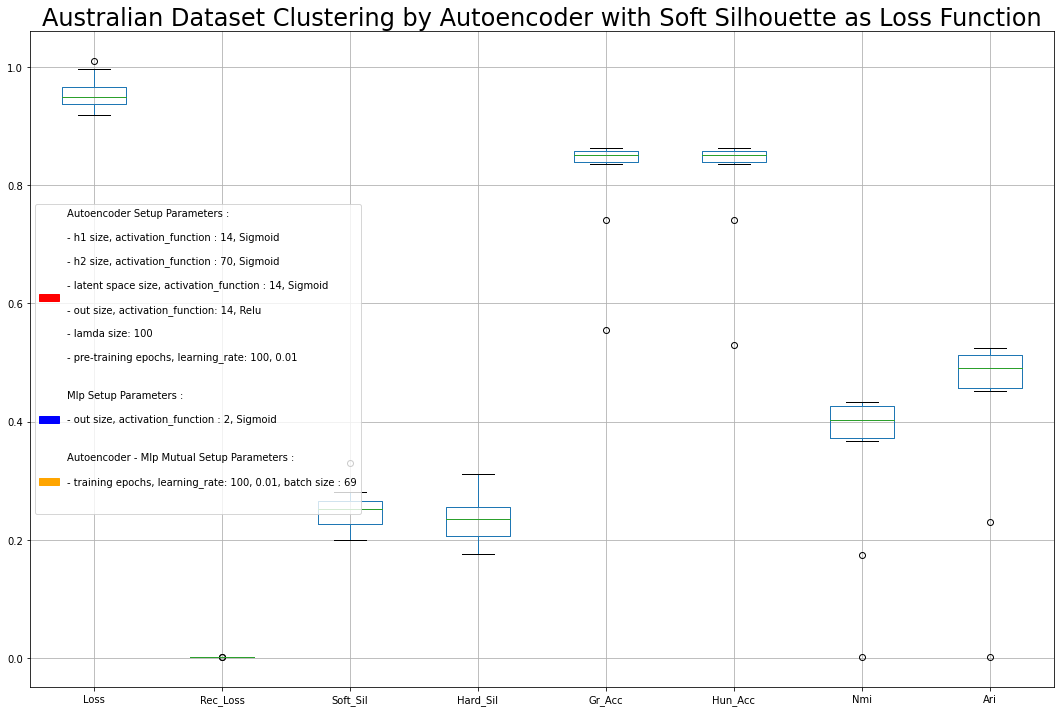

In [ ]:
fileName = setPath()
print(fileName)
figTitle = setFigureTitleandLegend()
dfs = []
for i in range(1,11):
    curdf = pd.read_excel(open(fileName+"_Data.xlsx", 'rb'),sheet_name='Exp_'+str(i),skiprows = [i for i in range(1, tr_epochs)])
    curdf = curdf.loc[:, ~curdf.columns.str.contains('^Unnamed')]
    curdf.rename(columns={'Greedy_Accuracy': 'Gr_Acc','Hungarian_Accuracy':'Hun_Acc'}, inplace=True)
    dfs.append(curdf)
result = pd.concat(dfs)

fig, ax = plt.subplots(figsize=(16, 10))
boxplot = result.boxplot()
plt.title(figTitle)

ax.set_title(figTitle, fontsize=24)

plt.legend(handles=patches)
plt.tight_layout()
plt.show()
fig.savefig(fileName+"_Boxplot.jpg", format="jpg")

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
#DataSetName = "Wine";
#dfs = []
#for i in range(1,11):
    #curdf = pd.read_excel(open("Results\\"+DataSetName+"\MLP_"+DataSetName+"_Soft_Silhouette_Data_All_Experiments.xlsx", 'rb'),sheet_name='Experiment_'+str(i),skiprows = [i for i in range(1, 100)])
    #curdf = curdf.loc[:, ~curdf.columns.str.contains('^Unnamed')]
    #curdf.rename(columns={'Greedy_Accuracy': 'Gr_Acc','Hungarian_Accuracy':'Hun_Acc'}, inplace=True)
    #dfs.append(curdf)
#result = pd.concat(dfs)

#statistics = result.describe()